# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
#output_file(CSV) 
output_data_file = "output_data/cities.csv" 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
#url = f"{url}appid={weather_api_key}&q"  
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"appid=" +weather_api_key +"&q=" + city + "&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taoudenni
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | road town
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | konarka
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | hailin
Processing Record 16 of Set 1 | capinota
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | bellevue
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | san

Processing Record 40 of Set 4 | enewetak
Processing Record 41 of Set 4 | songling
Processing Record 42 of Set 4 | bremervorde
Processing Record 43 of Set 4 | keflavik
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | hobyo
Processing Record 46 of Set 4 | luganville
Processing Record 47 of Set 4 | la passe
Processing Record 48 of Set 4 | juneau
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | fengzhou
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | vadso
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | palmer
Processing Record 5 of Set 5 | parambu
Processing Record 6 of Set 5 | san pedro pochutla
Processing Record 7 of Set 5 | luwuk
Processing Record 8 of Set 5 | inarajan village
Processing Record 9 of Set 5 | leon
Processing Record 10 of Set 5 | kailua-kona
Processing Record 11 of Set 5 | iskateley
Processing Record 12 of Set 5 | at taraf
Processing Record 13 of Set 5 | flying fish cove
Processing Reco

Processing Record 36 of Set 8 | labrador city
Processing Record 37 of Set 8 | yeppoon
Processing Record 38 of Set 8 | antalaha
Processing Record 39 of Set 8 | kourou
Processing Record 40 of Set 8 | okap
Processing Record 41 of Set 8 | asilah
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | betio village
Processing Record 45 of Set 8 | trairi
Processing Record 46 of Set 8 | al matlin
Processing Record 47 of Set 8 | kassala
Processing Record 48 of Set 8 | nemuro
Processing Record 49 of Set 8 | khilok
Processing Record 0 of Set 9 | sosnovoborsk
Processing Record 1 of Set 9 | susuman
Processing Record 2 of Set 9 | benghazi
Processing Record 3 of Set 9 | vila velha
Processing Record 4 of Set 9 | kodinar
Processing Record 5 of Set 9 | mongo
Processing Record 6 of Set 9 | paita
Processing Record 7 of Set 9 | mugia
Processing Record 8 of Set 9 | lebu
Processing Record 9 of Set 9 | sinabang
Processing Record 10 of Set 9 | acarau
Proce

Processing Record 27 of Set 12 | prado
Processing Record 28 of Set 12 | barranqueras
Processing Record 29 of Set 12 | ciudad lazaro cardenas
Processing Record 30 of Set 12 | puerto cabezas
Processing Record 31 of Set 12 | camacupa
Processing Record 32 of Set 12 | newman
Processing Record 33 of Set 12 | yangor
City not found. Skipping...
Processing Record 34 of Set 12 | yarmouth
Processing Record 35 of Set 12 | tarapur
Processing Record 36 of Set 12 | sola
Processing Record 37 of Set 12 | pimentel
Processing Record 38 of Set 12 | bontang
Processing Record 39 of Set 12 | ca mau
Processing Record 40 of Set 12 | taman rajawali
City not found. Skipping...
Processing Record 41 of Set 12 | itoman
Processing Record 42 of Set 12 | islamkot
Processing Record 43 of Set 12 | buala
Processing Record 44 of Set 12 | puerto armuelles
Processing Record 45 of Set 12 | chinde
Processing Record 46 of Set 12 | soe
Processing Record 47 of Set 12 | east ballina
Processing Record 48 of Set 12 | lianzhou
Proce

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taoudenni,22.6783,-3.9836,32.93,17,5,7.92,ML,1696299256
1,olonkinbyen,70.9221,-8.7187,2.88,84,77,7.18,SJ,1696299216
2,port-aux-francais,-49.3500,70.2167,2.33,76,75,15.36,TF,1696299210
3,road town,18.4167,-64.6167,29.05,84,75,3.09,VG,1696299166
4,waitangi,-43.9535,-176.5597,8.23,93,100,6.71,NZ,1696299211


In [25]:

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")   
#city_data_df.to_csv("city_data.csv")

In [26]:
# Read saved data
city_data_df = pd.read_csv("city_data.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0.1,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,adamstown,-25.0660,-130.1015,293.80,84,8,10.38,PN,1696036520
1,1,1,pisco,-13.7000,-76.2167,291.18,88,0,7.72,PE,1696036462
2,2,2,emerald,-23.5333,148.1667,300.01,45,0,5.41,AU,1696036520
3,3,3,oban,56.4127,-5.4706,284.47,84,30,2.07,GB,1696036520
4,4,4,east london,-33.0153,27.9116,293.40,56,100,1.90,ZA,1696036510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

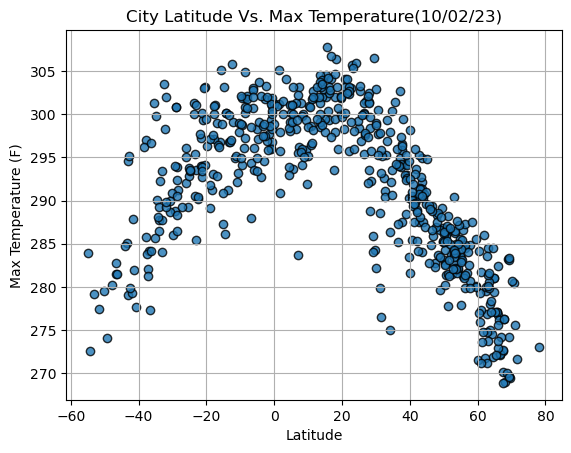

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
             edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")                                  
# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

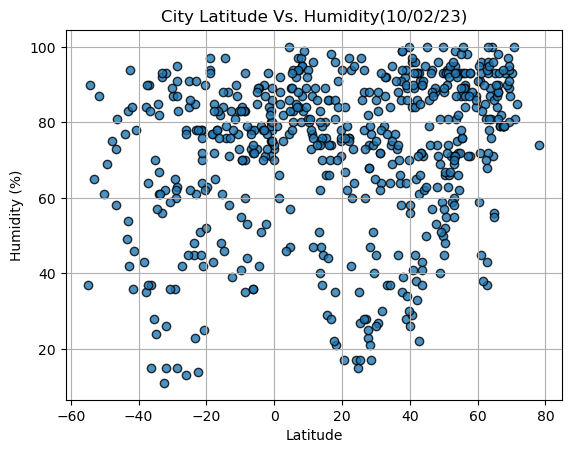

In [28]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

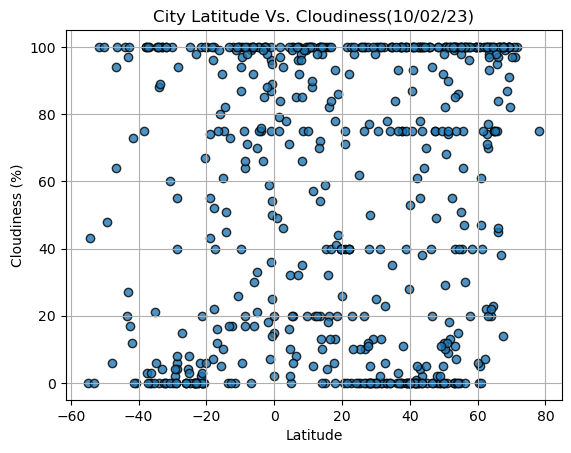

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
           
# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

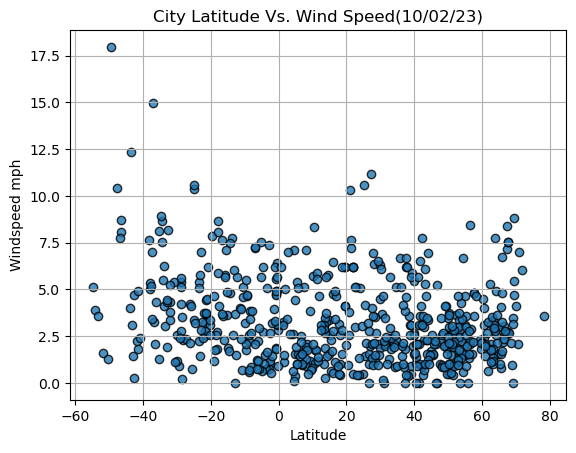

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [4]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
     # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [5]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

#(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)) 
    

# Display sample data
northern_hemi_df.head()

NameError: name 'city_data_df' is not defined

In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0.1,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,adamstown,-25.0660,-130.1015,293.80,84,8,10.38,PN,1696036520
1,1,1,pisco,-13.7000,-76.2167,291.18,88,0,7.72,PE,1696036462
2,2,2,emerald,-23.5333,148.1667,300.01,45,0,5.41,AU,1696036520
4,4,4,east london,-33.0153,27.9116,293.40,56,100,1.90,ZA,1696036510
6,6,6,mazagao,-0.1150,-51.2894,301.18,73,2,2.83,BR,1696036521


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8618793540146648


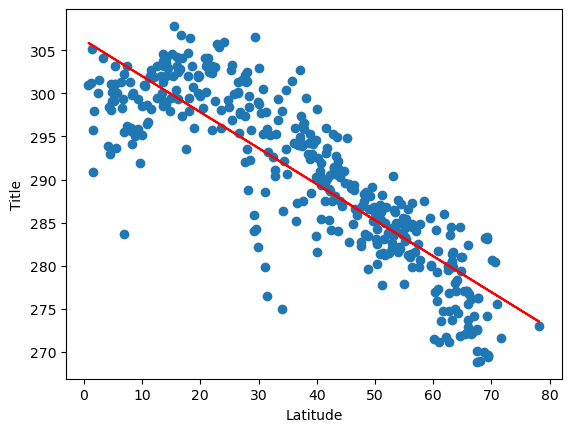

In [106]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7268072319688096


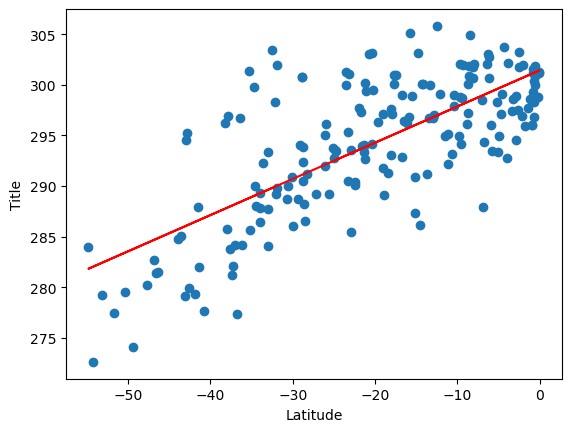

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1460212999973293


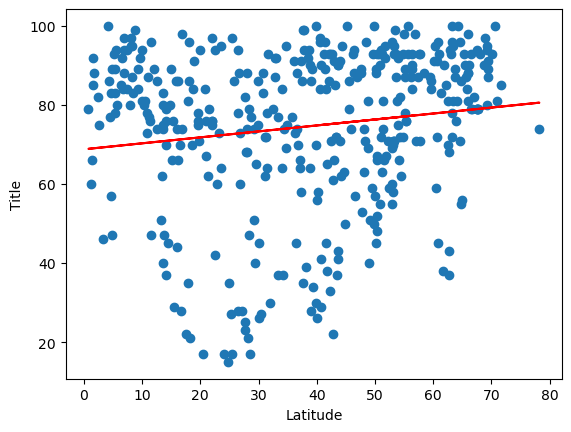

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.2215948575456888


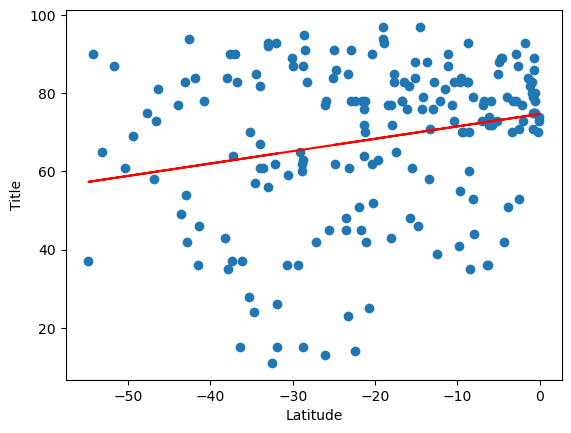

In [109]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11669093512977406


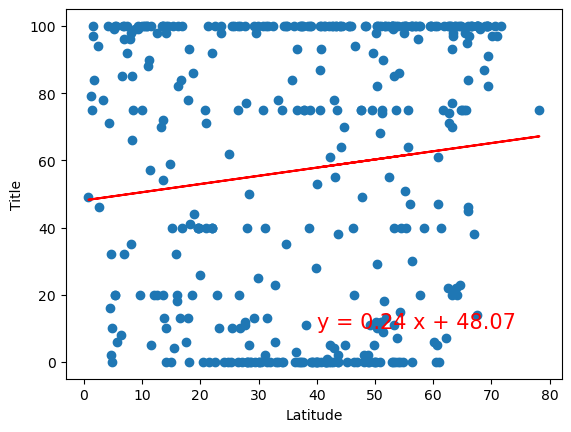

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.1971654753842121


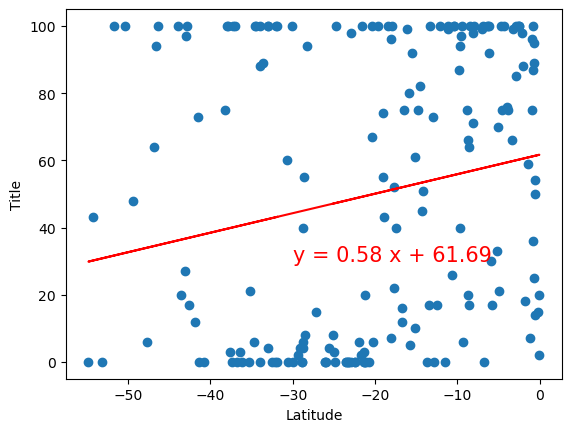

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.007894560755309497


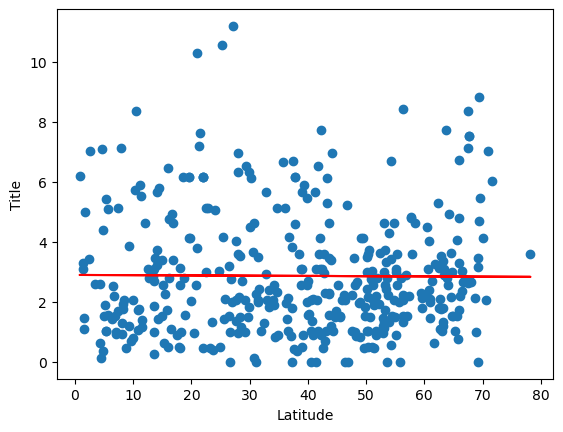

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.273346380399262


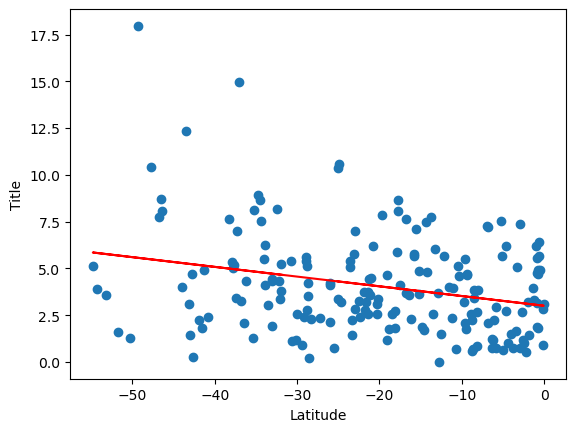

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE